In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

https://www.toptal.com/finance/financial-modeling/python-and-finance

In [2]:
years = ['2018A', '2019B', '2020P', '2021P', '2022P', '2023P']
sales = pd.Series(index=years)
sales['2018A'] = 31.0  
sales

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


2018A    31.0
2019B     NaN
2020P     NaN
2021P     NaN
2022P     NaN
2023P     NaN
dtype: float64

In [3]:
growth_rate = 0.1
for year in range(1, 6):
    sales[year] = sales[year - 1] * (1 + growth_rate)
    
sales

2018A    31.00000
2019B    34.10000
2020P    37.51000
2021P    41.26100
2022P    45.38710
2023P    49.92581
dtype: float64

In [4]:
type(sales)

pandas.core.series.Series

In [5]:
ebitda_margin = 0.14
depr_percent = 0.032

In [6]:
ebitda = sales * ebitda_margin
ebitda 

2018A    4.340000
2019B    4.774000
2020P    5.251400
2021P    5.776540
2022P    6.354194
2023P    6.989613
dtype: float64

In [7]:
depreciation = sales * depr_percent 
depreciation 

2018A    0.992000
2019B    1.091200
2020P    1.200320
2021P    1.320352
2022P    1.452387
2023P    1.597626
dtype: float64

In [8]:
ebit = ebitda - depreciation 
ebit 

2018A    3.348000
2019B    3.682800
2020P    4.051080
2021P    4.456188
2022P    4.901807
2023P    5.391987
dtype: float64

In [9]:
nwc_percent = 0.24
nwc = sales * nwc_percent
nwc 

2018A     7.440000
2019B     8.184000
2020P     9.002400
2021P     9.902640
2022P    10.892904
2023P    11.982194
dtype: float64

In [10]:
change_in_nwc = nwc.shift(1) - nwc 
change_in_nwc

2018A         NaN
2019B   -0.744000
2020P   -0.818400
2021P   -0.900240
2022P   -0.990264
2023P   -1.089290
dtype: float64

In [11]:
capex_percent = depr_percent
capex = -(sales * capex_percent)
capex 

2018A   -0.992000
2019B   -1.091200
2020P   -1.200320
2021P   -1.320352
2022P   -1.452387
2023P   -1.597626
dtype: float64

In [12]:
tax_rate = 0.25
tax_payment = -ebit * tax_rate
tax_payment 

2018A   -0.837000
2019B   -0.920700
2020P   -1.012770
2021P   -1.114047
2022P   -1.225452
2023P   -1.347997
dtype: float64

In [13]:
tax_payment = tax_payment.apply(lambda x: min(x, 0))
free_cash_flow = ebit + depreciation + tax_payment + capex + change_in_nwc
free_cash_flow

2018A         NaN
2019B    2.018100
2020P    2.219910
2021P    2.441901
2022P    2.686091
2023P    2.954700
dtype: float64

In [14]:
type(free_cash_flow)

pandas.core.series.Series

In [15]:
#Performing the DCF Valuation
cost_of_capital = 0.12
terminal_growth = 0.02
terminal_value = ((free_cash_flow[-1] * (1 + terminal_growth)) / 
                 (cost_of_capital - terminal_growth))
terminal_value 

30.137942141999986

In [16]:
discount_factors = [(1 / (1 + cost_of_capital)) ** i for i in range (1,6)]
discount_factors 

[0.8928571428571428,
 0.7971938775510203,
 0.711780247813411,
 0.6355180784048311,
 0.5674268557185992]

In [5]:
dcf_value = (sum(free_cash_flow[1:] * discount_factors) +
            terminal_value * discount_factors[-1])
dcf_value

25.79438401113792

In [6]:
output = pd.DataFrame([sales, ebit, free_cash_flow],
                     index=['Sales', 'EBIT', 'Free Cash Flow']).round(1)
output.to_excel('Python DCF Model Output.xlsx')
output

,2018A,2019B,2020P,2021P,2022P,2023P
Sales,31.0,34.1,37.5,41.3,45.4,49.9
EBIT,3.3,3.7,4.1,4.5,4.9,5.4
Free Cash Flow,NaN,2.0,2.2,2.4,2.7,3.0


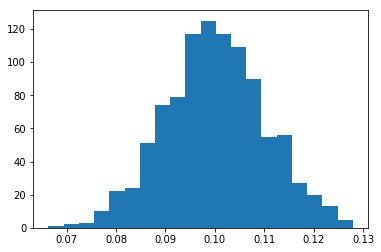

In [7]:
iterations = 1000
sales_growth_dist = np.random.normal(loc=0.1, scale=0.01, size=iterations)
ebitda_margin_dist = np.random.normal(loc=0.14, scale=0.02, size=iterations)
nwc_percent_dist = np.random.normal(loc=0.24, scale=0.01, size=iterations)
plt.hist(sales_growth_dist, bins=20)
plt.show()

In [8]:
def run_mcs():
    
    # Create probability distributions
    sales_growth_dist = np.random.normal(loc=0.1, scale=0.01, size=iterations)
    ebitda_margin_dist = np.random.normal(loc=0.14, scale=0.02, size=iterations)
    nwc_percent_dist = np.random.normal(loc=0.24, scale=0.01, size=iterations)
    
    # Calculate DCF value for each set of random inputs
    output_distribution = []
    for i in range(iterations):
        for year in range(1, 6):
            sales[year] = sales[year - 1] * (1 + sales_growth_dist[0])
        ebitda = sales * ebitda_margin_dist[i]
        depreciation = (sales * depr_percent)
        ebit = ebitda - depreciation
        nwc = sales * nwc_percent_dist[i]
        change_in_nwc = nwc.shift(1) - nwc 
        capex = -(sales * capex_percent)
        tax_payment = -ebit * tax_rate
        tax_payment = tax_payment.apply(lambda x: min(x, 0))
        free_cash_flow = ebit + depreciation + tax_payment + capex + change_in_nwc
        
        # DCF valuation
        terminal_value = (free_cash_flow[-1] * 1.02) / (cost_of_capital - 0.02)
        free_cash_flow[-1] += terminal_value
        discount_factors = [(1 / (1 + cost_of_capital)) ** i for i in range (1,6)]
        dcf_value = sum(free_cash_flow[1:] * discount_factors )
        output_distribution.append(dcf_value)
    
    return output_distribution

Wall time: 1.65 s


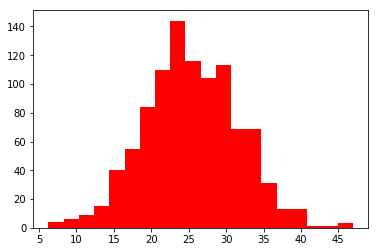

In [9]:
%time plt.hist(run_mcs(), bins=20, color='r')
plt.show()

In [17]:
# Key inputs from DCF model
years = 5
starting_sales = 31.0
capex_percent = depr_percent = 0.032
sales_growth = 0.1
ebitda_margin = 0.14
nwc_percent = 0.24
tax_rate = 0.25
# DCF assumptions
r = 0.12
g = 0.02
# For MCS model
iterations = 1000
sales_std_dev = 0.01
ebitda_std_dev = 0.02
nwc_std_dev = 0.01

In [19]:
sales_growth_dist = np.random.normal(loc=sales_growth, 
                                     scale=sales_std_dev, 
                                     size=(years, iterations))
sales_growth_dist 

array([[0.10358899, 0.10182374, 0.11289222, ..., 0.08415678, 0.10154128,
        0.10130296],
       [0.11041246, 0.10486604, 0.10028479, ..., 0.0983448 , 0.09458828,
        0.10553426],
       [0.11031339, 0.1023964 , 0.09608681, ..., 0.09530558, 0.10108603,
        0.0956256 ],
       [0.10931637, 0.08266877, 0.11028023, ..., 0.09525077, 0.1028994 ,
        0.08598642],
       [0.09204557, 0.09630116, 0.0933597 , ..., 0.1116319 , 0.09168009,
        0.10594126]])

In [20]:
sales_growth_dist += 1 
sales_growth_dist 

array([[1.10358899, 1.10182374, 1.11289222, ..., 1.08415678, 1.10154128,
        1.10130296],
       [1.11041246, 1.10486604, 1.10028479, ..., 1.0983448 , 1.09458828,
        1.10553426],
       [1.11031339, 1.1023964 , 1.09608681, ..., 1.09530558, 1.10108603,
        1.0956256 ],
       [1.10931637, 1.08266877, 1.11028023, ..., 1.09525077, 1.1028994 ,
        1.08598642],
       [1.09204557, 1.09630116, 1.0933597 , ..., 1.1116319 , 1.09168009,
        1.10594126]])

In [23]:
sales_growth_dist[1] 

array([1.11041246, 1.10486604, 1.10028479, 1.0855728 , 1.10262359,
       1.11931191, 1.09213087, 1.11088557, 1.0904122 , 1.09486412,
       1.08616781, 1.09998409, 1.0996251 , 1.09339995, 1.08006413,
       1.10234731, 1.10647975, 1.09127831, 1.08805832, 1.09961788,
       1.10712525, 1.10899479, 1.08693411, 1.09268845, 1.09528637,
       1.10749918, 1.09683319, 1.11074257, 1.09731105, 1.08936975,
       1.11106217, 1.08754246, 1.09598283, 1.11904896, 1.09794028,
       1.10331223, 1.08579026, 1.08339123, 1.10001137, 1.10096628,
       1.08634745, 1.08959383, 1.08824841, 1.09340349, 1.09616996,
       1.10841224, 1.1089018 , 1.09932833, 1.1131544 , 1.09111326,
       1.09194066, 1.09689851, 1.11220035, 1.11137684, 1.10696979,
       1.10688546, 1.09533977, 1.11066198, 1.11422735, 1.10991961,
       1.08308759, 1.11628679, 1.1027943 , 1.08928239, 1.09691325,
       1.10267336, 1.09919995, 1.08933484, 1.09866401, 1.09412444,
       1.10100104, 1.10849085, 1.10709803, 1.09062613, 1.08824

In [21]:
def run_mcs():
    
    # Generate probability distributions
    sales_growth_dist = np.random.normal(loc=sales_growth, 
                                         scale=sales_std_dev, 
                                         size=(years, iterations))
    ebitda_margin_dist = np.random.normal(loc=ebitda_margin, 
                                          scale=ebitda_std_dev, 
                                          size=(years, iterations))
    nwc_percent_dist = np.random.normal(loc=nwc_percent, 
                                        scale=nwc_std_dev, 
                                        size=(years, iterations))
    
    # Calculate free cash flow
    sales_growth_dist += 1
    for i in range(1, len(sales_growth_dist)):
        sales_growth_dist[i] *= sales_growth_dist[i-1]
    sales = sales_growth_dist * starting_sales
    ebitda = sales * ebitda_margin_dist
    ebit = ebitda - (sales * depr_percent)
    tax = -(ebit * tax_rate)
    np.clip(tax, a_min=None, a_max=0)
    nwc = nwc_percent_dist * sales
    starting_nwc = starting_sales * nwc_percent
    prev_year_nwc = np.roll(nwc, 1, axis=0)
    prev_year_nwc[0] = starting_nwc
    delta_nwc = prev_year_nwc - nwc
    capex = -(sales * capex_percent)
    free_cash_flow = ebitda + tax + delta_nwc + capex
    # Discount cash flows to get DCF value
    terminal_value = free_cash_flow[-1] * (1 + g) / (r - g)
    discount_rates = [(1 / (1 + r)) ** i for i in range (1,6)]
    dcf_value = sum((free_cash_flow.T * discount_rates).T) 
    dcf_value += terminal_value * discount_rates[-1]
    return dcf_value

Wall time: 36 ms


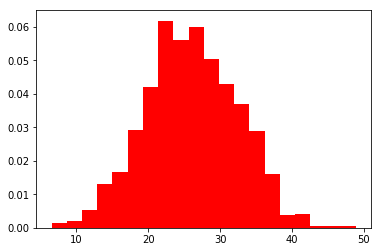

In [12]:
%time plt.hist(run_mcs(), bins=20, density=True, color="r")
plt.show()

In [ ]:
def run_mcs():
    
    # Generate probability distributions
    sales_growth_dist = np.random.normal(loc=sales_growth, 
                                         scale=sales_std_dev, 
                                         size=(years, iterations))
    ebitda_margin_dist = np.random.normal(loc=ebitda_margin, 
                                          scale=ebitda_std_dev, 
                                          size=(years, iterations))
    nwc_percent_dist = np.random.normal(loc=nwc_percent, 
                                        scale=nwc_std_dev, 
                                        size=(years, iterations))
    
    # Calculate free cash flow
    sales_growth_dist += 1
    for i in range(1, len(sales_growth_dist)):
        sales_growth_dist[i] *= sales_growth_dist[i-1]
    sales = sales_growth_dist * starting_sales
    ebitda = sales * ebitda_margin_dist
    ebit = ebitda - (sales * depr_percent)
    tax = -(ebit * tax_rate)
    np.clip(tax, a_min=None, a_max=0)
    nwc = nwc_percent_dist * sales
    starting_nwc = starting_sales * nwc_percent
    prev_year_nwc = np.roll(nwc, 1, axis=0)
    prev_year_nwc[0] = starting_nwc
    delta_nwc = prev_year_nwc - nwc
    capex = -(sales * capex_percent)
    free_cash_flow = ebitda + tax + delta_nwc + capex
    # Discount cash flows to get DCF value
    terminal_value = free_cash_flow[-1] * (1 + g) / (r - g)
    discount_rates = [(1 / (1 + r)) ** i for i in range (1,6)]
    dcf_value = sum((free_cash_flow.T * discount_rates).T) 
    dcf_value += terminal_value * discount_rates[-1]
    return dcf_value

In [27]:
from argparse import Namespace
# All you need to do is 3 steps:
# step 1: just modify the parameters(args)
# step 2: and then Instantiate the class DCFModel and pass the args like this: obj = DCFModel(args)
# step 3: call obj.predict()
args = Namespace(
    years=5,
    starting_sales=31.0,
    capex_percent=0.032,
    depr_percent=0.032,
    sales_growth = 0.1,
    ebitda_margin = 0.14,
    nwc_percent = 0.24,
    tax_rate = 0.25,
    # DCF assumptions
    r = 0.12,
    g = 0.02,
    # For MCS model
    iterations = 1,
    sales_std_dev = 0.01,
    ebitda_std_dev = 0.02,
    nwc_std_dev = 0.01
)
class DCFModel(object):
    def __init__(self,args):
        self.args = args 
    def predict(self):

        # Generate samples
        sales_growth_dist = np.random.normal(loc=self.args.sales_growth, 
                                             scale=self.args.sales_std_dev, 
                                             size=(self.args.years, self.args.iterations))
        ebitda_margin_dist = np.random.normal(loc=self.args.ebitda_margin, 
                                              scale=self.args.ebitda_std_dev, 
                                              size=(self.args.years, self.args.iterations))
        nwc_percent_dist = np.random.normal(loc=self.args.nwc_percent, 
                                            scale=self.args.nwc_std_dev, 
                                            size=(self.args.years, self.args.iterations))

        # Calculate free cash flow
        sales_growth_dist += 1
        for i in range(1, len(sales_growth_dist)):
            sales_growth_dist[i] *= sales_growth_dist[i-1]
        sales = sales_growth_dist * self.args.starting_sales
        ebitda = sales * ebitda_margin_dist
        ebit = ebitda - (sales * self.args.depr_percent)
        tax = -(ebit * self.args.tax_rate)
        np.clip(tax, a_min=None, a_max=0)
        nwc = nwc_percent_dist * sales
        starting_nwc = self.args.starting_sales * self.args.nwc_percent
        prev_year_nwc = np.roll(nwc, 1, axis=0)
        prev_year_nwc[0] = starting_nwc
        delta_nwc = prev_year_nwc - nwc
        capex = -(sales * self.args.capex_percent)
        free_cash_flow = ebitda + tax + delta_nwc + capex
        
        # Discount cash flows to get DCF value
        terminal_value = free_cash_flow[-1] * (1 + self.args.g) / (self.args.r - self.args.g)
        discount_rates = [(1 / (1 + self.args.r)) ** i for i in range (1,6)]
        dcf_value = sum((free_cash_flow.T * discount_rates).T) 
        dcf_value += terminal_value * discount_rates[-1]
        return dcf_value
    
obj = DCFModel(args)
obj.predict()

In [31]:
obj = DCFModel(args)
obj.predict()

array([16.55239732])